# TIME SERIES Volume Perdagangan Mineral Indonesia

Dataset yang kita ambil tentang Volume Perdagangan Mineral Indonesia yang dikumpulkan secara historis dan memprediksi nilai masa depannya. Untuk tujuan menerapkan teknik peramalan deret waktu. Deret waktu bersifat univariat dengan fitur tanggal dan waktu.

## Load Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd
import numpy as np
from numpy import array
df = pd.read_csv('https://raw.githubusercontent.com/triasmidwi/dataset/main/ADMR.JK.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-15,1980.0,1990.0,1850.0,1850.0,1850.0,261881600
1,2022-06-16,1820.0,2030.0,1820.0,1935.0,1935.0,205181200
2,2022-06-17,1920.0,1920.0,1800.0,1815.0,1815.0,181825400
3,2022-06-20,1815.0,1845.0,1710.0,1765.0,1765.0,252614300
4,2022-06-21,1770.0,1815.0,1730.0,1760.0,1760.0,165844100
...,...,...,...,...,...,...,...
242,2023-06-08,830.0,860.0,820.0,840.0,840.0,19599800
243,2023-06-09,840.0,860.0,830.0,830.0,830.0,15719300
244,2023-06-12,830.0,855.0,830.0,845.0,845.0,14281800
245,2023-06-13,845.0,845.0,810.0,815.0,815.0,17415700


In [ ]:
# Menghapus baris terakhir
df = df.drop(df.index[-1])

In [ ]:
df.shape

(246, 7)

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-15,1980.0,1990.0,1850.0,1850.0,1850.0,261881600
1,2022-06-16,1820.0,2030.0,1820.0,1935.0,1935.0,205181200
2,2022-06-17,1920.0,1920.0,1800.0,1815.0,1815.0,181825400
3,2022-06-20,1815.0,1845.0,1710.0,1765.0,1765.0,252614300
4,2022-06-21,1770.0,1815.0,1730.0,1760.0,1760.0,165844100
...,...,...,...,...,...,...,...
241,2023-06-07,820.0,840.0,785.0,830.0,830.0,43174900
242,2023-06-08,830.0,860.0,820.0,840.0,840.0,19599800
243,2023-06-09,840.0,860.0,830.0,830.0,830.0,15719300
244,2023-06-12,830.0,855.0,830.0,845.0,845.0,14281800


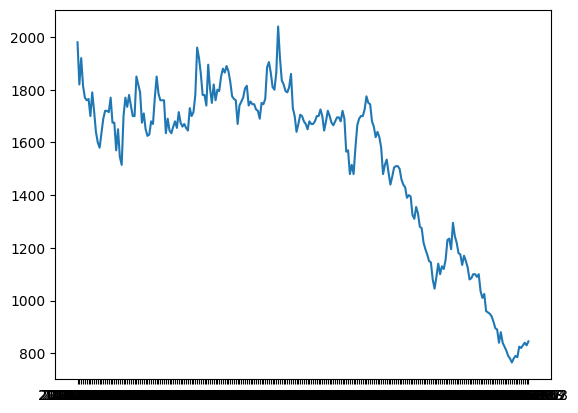

In [ ]:
# Plot data time series
plt.plot(df['Date'], df['Open'], label='Open')

In [ ]:
df_open = df['Open']

## Univariate Transform

In [ ]:
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)

  return array(X), array(y)

In [ ]:
n_steps = 3
X, y = split_sequence(df_open, n_steps)

In [ ]:
print(X.shape, y.shape)

(243, 3) (243,)


In [ ]:
# column names to X and y data frames
df_X = pd.DataFrame(X, columns=['t-'+str(i+1) for i in range(n_steps-1, -1,-1)])
df_y = pd.DataFrame(y, columns=['t (prediction)'])

# concat df_X and df_y
df = pd.concat([df_X,df_y], axis=1)

In [ ]:
df

,t-3,t-2,t-1,t (prediction)
0,1980.0,1820.0,1920.0,1815.0
1,1820.0,1920.0,1815.0,1770.0
2,1920.0,1815.0,1770.0,1760.0
3,1815.0,1770.0,1760.0,1765.0
4,1770.0,1760.0,1765.0,1700.0
...,...,...,...,...
238,790.0,785.0,825.0,820.0
239,785.0,825.0,820.0,830.0
240,825.0,820.0,830.0,840.0
241,820.0,830.0,840.0,830.0


## Minmax Scaler

In [ ]:
#Normalisasi data
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_norm= scaler.fit_transform(df_X)
X_norm
y_norm= scaler.fit_transform(df_y)

In [ ]:
#split data train 80% test 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.2, random_state=0)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

In [ ]:
# Melakukan fitting dan prediksi menggunakan model KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=6)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

# Melakukan fitting dan prediksi menggunakan model DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# Melakukan fitting dan prediksi menggunakan model RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Melakukan fitting dan prediksi menggunakan model LinearRegression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Melakukan fitting dan prediksi menggunakan model SVR
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_preds = svr_model.predict(X_test)

<ipython-input-16-ac558b4a0f8b>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#KNN
mape = mean_absolute_percentage_error(y_test,knn_preds)
mae = mean_absolute_error(y_test,knn_preds)
akurasi = 1 - (mae / np.mean(y_test))
print ("MAPE :",mape,"MAE",mae, "Akurasi",akurasi)

#DT
mape = mean_absolute_percentage_error(y_test,dt_preds)
mae = mean_absolute_error(y_test,dt_preds)
akurasi = 1 - (mae / np.mean(y_test))
print ("MAPE :",mape,"MAE",mae,"Akurasi",akurasi)

#RF
mape = mean_absolute_percentage_error(y_test,rf_preds)
mae = mean_absolute_error(y_test,rf_preds)
akurasi = 1 - (mae / np.mean(y_test))
print ("MAPE :",mape,"MAE",mae,"Akurasi",akurasi)

#LR
mape = mean_absolute_percentage_error(y_test,lr_preds)
mae = mean_absolute_error(y_test,lr_preds)
akurasi = 1 - (mae / np.mean(y_test))
print ("MAPE :",mape,"MAE",mae,"Akurasi",akurasi)

#SVR
mape = mean_absolute_percentage_error(y_test,svr_preds)
mae = mean_absolute_error(y_test,svr_preds)
akurasi = 1 - (mae / np.mean(y_test))
print ("MAPE :",mape,"MAE",mae,"Akurasi",akurasi)

MAPE : 0.10023251525645809 MAE 0.036494597839135653 Akurasi 0.9418812133571246
MAPE : 0.17409378239426088 MAE 0.046498599439775926 Akurasi 0.9259495284221259
MAPE : 0.10079823058117579 MAE 0.03652180872348945 Akurasi 0.9418378791741013
MAPE : 0.0776163931210786 MAE 0.03438333643038145 Akurasi 0.9452434630770308
MAPE : 0.36482864948681903 MAE 0.05169322374884657 Akurasi 0.9176769270020599


### save model

In [ ]:
import pickle
with open('minmax_pkl', 'wb') as files:
    pickle.dump(scaler, files)

In [ ]:
import pickle
with open('model_LR_pkl', 'wb') as files:
    pickle.dump(lr_model, files)

## Standart Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
scaledX = scaler.fit_transform(df_X)
scaledY = scaler.fit_transform(df_y)
features_namesX = df_X.columns.copy()
features_namesy = df_y.columns.copy()
scaled_featuresX = pd.DataFrame(scaledX, columns=features_namesX)
scaled_featuresY = pd.DataFrame(scaledY, columns=features_namesy)

In [ ]:
#split data
from sklearn.model_selection import train_test_split
training, test = train_test_split(scaled_featuresX,test_size=0.1, random_state=0,shuffle=False)#Nilai X training dan Nilai X testing
training_label, test_label = train_test_split(scaled_featuresY, test_size=0.1, random_state=0,shuffle=False)#Nilai Y training dan Nilai Y testing

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [ ]:
# Mengembalikan data ke dalam format biasa
denormalized_data_test = pd.DataFrame(scaler.inverse_transform(test_label),columns=["Testing Data"])
denormalized_data_test = scaler.fit_transform(denormalized_data_test)
denormalized_data_test = pd.DataFrame(scaler.inverse_transform(test_label),columns=["Testing Data"])
print(denormalized_data_test)

    Testing Data
0   3.454780e+07
1   3.011462e+07
2   2.333214e+07
3   2.276256e+07
4   3.196795e+07
5   2.963023e+07
6   2.854357e+07
7   2.562350e+07
8   2.005781e+07
9   2.316652e+07
10  1.950205e+07
11  2.466314e+07
12  1.969491e+07
13  1.973192e+07
14  2.231513e+07
15  1.888883e+07
16  1.872975e+07
17  1.955652e+07
18  2.289392e+07
19  2.467355e+07
20  1.871691e+07
21  1.773644e+07
22  1.737323e+07
23  1.816506e+07
24  1.376470e+07


### Bayesian Ridge Regression

In [ ]:
# Bayesian Ridge Regression
from sklearn import linear_model
clf = linear_model.BayesianRidge()
pred_test_bayesian_ridge = clf.fit(training, training_label).predict(test)

# data asli
denormalized_data_test_bayesian_ridge = pd.DataFrame(scaler.inverse_transform(test_label),columns=["Testing Data"])
denormalized_data_test_bayesian_ridge = scaler.fit_transform(denormalized_data_test)
denormalized_data_test_bayesian_ridge = pd.DataFrame(scaler.inverse_transform(test_label),columns=["Testing Data"])
# data prediksi
denormalized_data_preds_bayesian_ridge = pd.DataFrame(scaler.inverse_transform(pred_test_bayesian_ridge.reshape(-1, 1)),columns=["Predict Data"])

MSE_bayesian_ridge = abs(mean_squared_error(test_label,pred_test_bayesian_ridge))
MAPE_bayesian_ridge = mean_absolute_percentage_error(denormalized_data_test_bayesian_ridge, denormalized_data_preds_bayesian_ridge)
# MAE_bayesian_ridge = mean_absolute_error(denormalized_data_test_bayesian_ridge,denormalized_data_preds_bayesian_ridge)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("MSE_bayesian_ridge :",MSE_bayesian_ridge)
print("MAPE_bayesian_ridge :",MAPE_bayesian_ridge)

MSE_bayesian_ridge : 0.19056912529181488
MAPE_bayesian_ridge : 0.10617143944644783


### Multy Layer Perceptron Regressor

In [ ]:
# Multy Layer Perceptron Regressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
y_pred_MLPRegressor = MLPRegressor(random_state=1, max_iter=500).fit(training, training_label).predict(test)

# data asli
denormalized_data_test_MLPRegressor = pd.DataFrame(scaler.inverse_transform(test_label),columns=["Testing Data"])
denormalized_data_test_MLPRegressor = scaler.fit_transform(denormalized_data_test)
denormalized_data_test_MLPRegressor = pd.DataFrame(scaler.inverse_transform(test_label),columns=["Testing Data"])
# data prediksi
denormalized_data_preds_MLPRegressor = pd.DataFrame(scaler.inverse_transform(y_pred_MLPRegressor.reshape(-1, 1)),columns=["Predict Data"])

MSE_MLPRegressor = abs(mean_squared_error(test_label,y_pred_MLPRegressor))
MAPE_MLPRegressor = mean_absolute_percentage_error(denormalized_data_test_MLPRegressor, denormalized_data_preds_MLPRegressor)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print("MSE_MLPRegressor :",MSE_MLPRegressor)
print("MAPE_MLPRegressor :",MAPE_MLPRegressor)

MSE_MLPRegressor : 0.08653012462307305
MAPE_MLPRegressor : 0.0678146248083673


In [ ]:
y_pred_MLPRegressor

array([-0.3418279 ,  0.11902147, -0.08495907, -0.36647289, -0.44486549,
       -0.31208611, -0.13488031, -0.19983862, -0.31283902, -0.49337212,
       -0.47474626, -0.52368781, -0.47234116, -0.50860029, -0.5496729 ,
       -0.49702655, -0.54394885, -0.57962446, -0.56483141, -0.48764696,
       -0.40582052, -0.5312097 , -0.60262622, -0.62151031, -0.60957444])

### Multy Linier Regression

In [ ]:
# Multy Linier Regression
from sklearn.linear_model import LinearRegression
pred_test_linear_reg = LinearRegression().fit(training, training_label).predict(test)

# data asli
denormalized_data_test_linear_reg = pd.DataFrame(scaler.inverse_transform(test_label),columns=["Testing Data"])
denormalized_data_test_linear_reg = scaler.fit_transform(denormalized_data_test)
denormalized_data_test_linear_reg = pd.DataFrame(scaler.inverse_transform(test_label),columns=["Testing Data"])

# data prediksi
denormalized_data_preds_linear_reg = pd.DataFrame(scaler.inverse_transform(pred_test_linear_reg.reshape(-1, 1)),columns=["Predict Data"])

MSE_linear_reg = abs(mean_squared_error(test_label,pred_test_linear_reg))
MAPE_linear_reg = mean_absolute_percentage_error(denormalized_data_test_linear_reg, denormalized_data_preds_linear_reg)

In [ ]:
pred_test_linear_reg

array([[-0.06987681],
       [ 0.0405377 ],
       [-0.05374557],
       [-0.20013462],
       [-0.26902125],
       [-0.12848651],
       [-0.0841816 ],
       [-0.12200373],
       [-0.17777202],
       [-0.29156142],
       [-0.29154124],
       [-0.32204136],
       [-0.27278209],
       [-0.30577862],
       [-0.34905589],
       [-0.3078812 ],
       [-0.33925467],
       [-0.37201971],
       [-0.3603505 ],
       [-0.30027755],
       [-0.24267197],
       [-0.3211516 ],
       [-0.38924449],
       [-0.40364404],
       [-0.39432957]])

In [ ]:
training_label

,t (prediction)
0,1.240906
1,2.144782
2,1.036847
3,3.285097
4,1.147017
...,...
215,-0.849184
216,-0.477248
217,-0.593186
218,-0.771990


In [ ]:
print("MSE_linear_reg :",MSE_linear_reg)
print("MAPE_linear_reg :",MAPE_linear_reg)

MSE_linear_reg : 0.17957946098468822
MAPE_linear_reg : 0.10298750200886575
